# Download Dataset

In [ ]:
import os
from roboflow import Roboflow

api_key = os.getenv('API_KEY')
workspace = os.getenv('WORKSPACE')
project_name = os.getenv('PROJECT')
project_version = os.getenv('PROJECT_VERSION')
dataset_format = os.getenv('DATASET_FORMAT')

dataset_path = os.path.join(HOME, 'dataset')

if not os.path.exists(dataset_path) or not os.listdir(dataset_path):  # Only download if the folder is empty or doesn't exist
    os.makedirs(dataset_path, exist_ok=True)
    
    os.chdir(dataset_path)

    try:
        rf = Roboflow(api_key=api_key)
        project = rf.workspace(workspace).project(project_name)
        version = project.version(project_version)
        dataset = version.download(dataset_format)
        print(f"Dataset downloaded successfully in {dataset_path}")
    except Exception as e:
        print(f"Error downloading the dataset: {e}")

    os.chdir(HOME)
else:
    print(f"Dataset directory already exists at {dataset_path}. Skipping download.")

os.chdir(HOME)

### YOLOv9 Parameters

In [2]:
import os

HOME = os.getcwd()

# Paremeters
class YOLOv9BaseParameters:
    BATCH_SIZE = 4
    DATASET_DIRECTORY = f"{HOME}/datasets/data.yaml"
    EPOCH = 2
    IMAGE_SIZE = 640
    ITERATION = ""

# Experiments

In [3]:
from ultralytics import YOLO

# Build a YOLOv9c model from pretrained weight
model = YOLO("yolov9c-seg.pt")
model.info()

YOLOv9c-seg summary: 654 layers, 27,897,120 parameters, 0 gradients, 159.4 GFLOPs


(654, 27897120, 0, 159.41411839999998)

### Training

In [4]:

parameters = YOLOv9BaseParameters()

results = model.train(
    data = parameters.DATASET_DIRECTORY, 
    epochs = parameters.EPOCH,
    imgsz = parameters.IMAGE_SIZE,
    batch = parameters.BATCH_SIZE,
    cache = False
)

Ultralytics 8.3.65 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine/trainer: task=segment, mode=train, model=yolov9c-seg.pt, data=/app/datasets/data.yaml, epochs=2, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

E0000 00:00:1737463137.513056       9 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737463137.543586       9 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

100% 5.35M/5.35M [00:28<00:00, 199kB/s] 


AMP: checks passed ✅


train: Scanning /app/datasets/train/labels... 444 images, 0 backgrounds, 0 corrupt: 100% 444/444 [00:03<00:00, 136.99it/s]


train: New cache created: /app/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/ultralytics/ultralytics/data/augment.py:1853: UserWarning: Argument 'quality_lower' is not valid and will be ignored.
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /app/datasets/valid/labels... 17 images, 0 backgrounds, 0 corrupt: 100% 17/17 [00:00<00:00, 147.08it/s]


val: New cache created: /app/datasets/valid/labels.cache
Plotting labels to /ultralytics/runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 163 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /ultralytics/runs/segment/train
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/2      4.07G      1.361      2.882      1.533      1.612         29        640: 100% 111/111 [00:52<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:04<00:00,  1.47s/it]

                   all         17         82     0.0142      0.354     0.0137    0.00661     0.0132      0.329     0.0123    0.00459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/2      3.82G      1.178      2.265     0.8834      1.471         36        640: 100% 111/111 [00:51<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.31s/it]

                   all         17         82      0.773      0.915      0.914      0.601      0.769      0.902      0.911      0.595



2 epochs completed in 0.036 hours.
Optimizer stripped from /ultralytics/runs/segment/train/weights/last.pt, 56.2MB
Optimizer stripped from /ultralytics/runs/segment/train/weights/best.pt, 56.2MB

Validating /ultralytics/runs/segment/train/weights/best.pt...
Ultralytics 8.3.65 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv9c-seg summary (fused): 411 layers, 27,625,299 parameters, 0 gradients, 157.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:00<00:00,  3.20it/s]


                   all         17         82      0.772      0.915      0.913      0.601      0.768      0.902      0.911      0.595
Speed: 1.0ms preprocess, 32.4ms inference, 0.3ms loss, 2.1ms postprocess per image
Results saved to /ultralytics/runs/segment/train


### Evaluation over the Test Dataset

In [7]:
metrics = model.val(
    data=parameters.DATASET_DIRECTORY,
)

iou_score = metrics
p = metrics.seg.p
r = metrics.seg.r
iou_score = 1 / ((1 / p) + (1 / r - 1))

print(f"Precision: {p}")
print(f"Recall: {r}")
print(f"AP 50: {metrics.box.map50}")
print(f"AP 75: {metrics.box.map}")
print(f"AP 50:95: {metrics.box.map}")
print(f"IOU: {iou_score}")


Ultralytics 8.3.65 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)


val: Scanning /app/datasets/test/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100% 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  1.51it/s]


                   all          9         43      0.816      0.884      0.916      0.584      0.882      0.953      0.963      0.637
Speed: 0.7ms preprocess, 131.4ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to /ultralytics/runs/segment/train4
AP 50: 0.9157872936301358
AP 75: 0.584173832899161
AP 50:95: 0.584173832899161
IOU: ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f5f4040a6d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.01

In [67]:
print(metrics.seg)

ultralytics.utils.metrics.Metric object with attributes:

all_ap: array([[    0.96298,     0.93486,     0.87548,     0.85696,      0.8222,     0.80089,     0.68865,     0.39583,     0.03482,           0]])
ap: array([    0.63727])
ap50: array([    0.96298])
ap_class_index: array([0])
curves: []
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,    0.049049,     0.05005,   

['20-09-2023_DSLR_CLASS1-UNRIPE_NS07_05-02_JPG.rf.0412f57d41e923d5fe6ce89f2117d67e.jpg', '20-09-2023_DSLR_CLASS1-UNRIPE_NS23_05-04_JPG.rf.e10d290cd45ddecbf53f3d32934d6ddf.jpg', '20-09-2023_DSLR_CLASS2-MIDRIPE_HS09_05-02_JPG.rf.130539a4baa059be7e13a66e6243f3e9.jpg', '20-09-2023_DSLR_CLASS2-UNRIPE_NS07_05-03_JPG.rf.c76e0549f8e980927b90899d3f188a10.jpg', '20-09-2023_DSLR_CLASS2-UNRIPE_NS11_05-01_JPG.rf.021023a8e240c244b250aea9fb5a3668.jpg', '20-09-2023_DSLR_CLASS2-UNRIPE_NS11_05-02_JPG.rf.5ad068f18479e735ba466ac0d3afb2f3.jpg', 'IMG_0424_JPG.rf.bcbfd39696060a30f648da847c1f2367.jpg', 'IMG_20240123_084847_jpg.rf.5fbf49557f5941f461eb188da4dae510.jpg', 'IMG_20240123_112321_jpg.rf.258988d7ddc852ef795a68dea63c6d3f.jpg']
['datasets/test/images/IMG_20240123_112321_jpg.rf.258988d7ddc852ef795a68dea63c6d3f.jpg', 'datasets/test/images/20-09-2023_DSLR_CLASS2-UNRIPE_NS11_05-01_JPG.rf.021023a8e240c244b250aea9fb5a3668.jpg', 'datasets/test/images/20-09-2023_DSLR_CLASS2-UNRIPE_NS11_05-02_JPG.rf.5ad068f18479

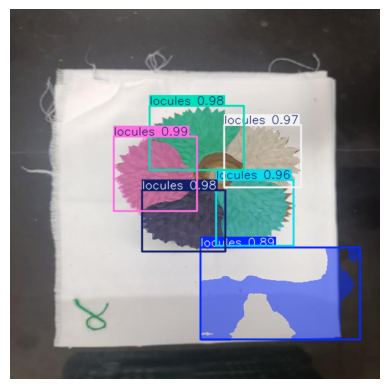

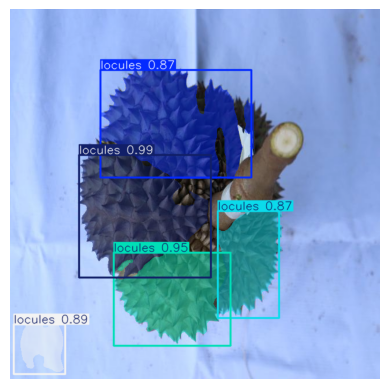

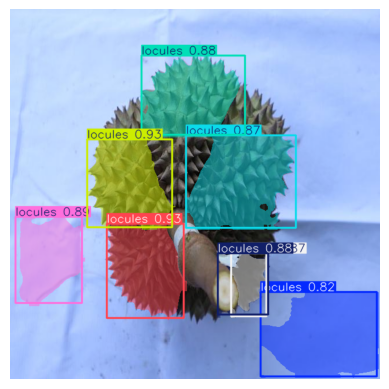

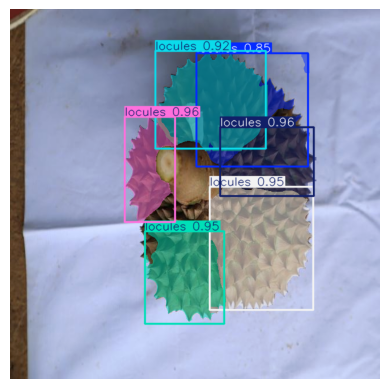

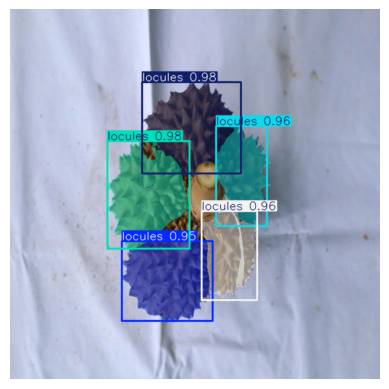

In [65]:
%matplotlib inline

import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = os.listdir("datasets/test/images")
random_images = random.sample(images, 5)
images = [f"datasets/test/images/{img}" for img in random_images]

results = model.predict(images, conf=0.8)
grid_size = (len(results), 5)
for image in results:
    img_array = image.plot(color_mode='instance', boxes=True, line_width=2)
    plt.imshow(img_array[..., ::-1])
    plt.axis('off')  
    plt.show()
    
def display_bounding_boxes(image_data, maximum_images=3):
    """
    Display images with their ground truth and predicted bounding boxes in a grid layout.

    Args:
        image_data: A dictionary where keys are image IDs and values are lists of tuples
                    containing (image, gt_box, best_pred_box).
    """
    max_columns = 6  # Maximum number of columns
    selected_image_ids = np.random.choice(
        list(image_data.keys()), maximum_images, replace=False
    )

    # Create a new dictionary with the selected items
    selected_images = {
        image_id: image_data[image_id] for image_id in selected_image_ids
    }
    image_data = selected_images

    rows = len(image_data)  # Number of unique image IDs
    grid_size = (rows, max_columns)  # Grid size (rows, columns)

    fig, axes = plt.subplots(*grid_size, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Flatten the grid for easy iteration

    for idx, (image_id, bounding_boxes) in enumerate(image_data.items()):
        for col in range(max_columns):
            ax = axes[idx * max_columns + col]
            if col < len(bounding_boxes):
                image, gt_box, best_pred_box = bounding_boxes[col]
                draw_bounding_boxes(ax, image, gt_box, best_pred_box, image_id)
            else:
                ax.axis("off")  # Hide axes if no image available

    plt.tight_layout(pad=0.5, h_pad=0.5)  # Adjust layout
    plt.show()


# for img in images:
#     # results = []
#     model.predict(f"datasets/test/images/{img}", conf=0.8)
    
#     # results.append(model.predict(img, show=True, save=True))
    
# print(results[0].tojson())